In [29]:
import requests
import re
import json
import os
import numpy as np
import pandas as pd
import requests
from io import StringIO

# Gathering data

In [30]:
#WeRateDogs dataset
df_WeRateDogs = pd.read_csv('twitter-archive-enhanced.csv')

#imagePrediction dataset
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
df_imagePrediction = pd.read_csv(StringIO(r.text),sep='\t')

#tweet-json dataset(json format, needs further cleaning)
#Tried to apply for API from twitter, but I don't know why even with the reason provided, they still doesn't pass my 
#application
list_tweepy = []
with open('tweet-json.txt', encoding='utf8') as f:
    for each in f:
        data = json.loads(each)
        list_tweepy.append(data)

# Assessing data

In [31]:
#WeRateDogs
df_WeRateDogs.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
998,748307329658011649,NaN,NaN,2016-06-30 00:09:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This sherk must've leapt out of the water and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748307329...,7,10,None,None,None,None,None


In [32]:
df_WeRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [33]:
df_WeRateDogs[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [34]:
len(df_WeRateDogs[df_WeRateDogs['retweeted_status_id'].isnull()==False])

181

In [35]:
print(df_WeRateDogs[['tweet_id']].shape[0])
print(df_WeRateDogs[['tweet_id']].drop_duplicates().shape[0])

print()

print(df_WeRateDogs['expanded_urls'].shape[0])
print(df_WeRateDogs['expanded_urls'].drop_duplicates().shape[0])

2356
2356

2356
2219


In [36]:
#imagePrediction
df_imagePrediction.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1727,820446719150292993,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True


In [37]:
df_imagePrediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
df_imagePrediction[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


In [39]:
print(df_imagePrediction['tweet_id'].shape[0])
print(df_imagePrediction['tweet_id'].drop_duplicates().shape[0])

print("")

print(df_imagePrediction['jpg_url'].shape[0])
print(df_imagePrediction['jpg_url'].drop_duplicates().shape[0])

2075
2075

2075
2009


In [40]:
#tweet_json(needs to convert to dataframe)
tweet_id = []
retweet_count = []
favourite_count = []

for each in range(len(list_tweepy)):
    tweet_id.append(list_tweepy[each]['id'])
    retweet_count.append(list_tweepy[each]['retweet_count'])
    favourite_count.append(list_tweepy[each]['favorite_count'])

df_tweepy={'tweet_id':tweet_id,
        'retweet_count':retweet_count,
        'favourite_count':favourite_count}

df_tweepy = pd.DataFrame.from_dict(df_tweepy)

In [41]:
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null int64
retweet_count      2354 non-null int64
favourite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [42]:
df_tweepy.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [43]:
print(df_tweepy['tweet_id'].shape[0])
print(df_tweepy['tweet_id'].drop_duplicates().shape[0])

2354
2354


# Cleaning Data

In [44]:
WeRateDogsCopy = df_WeRateDogs.copy()
imagePredictionCopy = df_imagePrediction.copy()
tweepyCopy = df_tweepy.copy()

In [45]:
#1: Clean datatypes

#1.1:Change datatype of df_WeRateDogs

convert_dict={#'tweet_id':'object',
              'in_reply_to_status_id':'object',
              'in_reply_to_user_id':'object',
              'rating_numerator':'float64',
              'rating_denominator':'float64'}
WeRateDogsCopy = WeRateDogsCopy.astype(convert_dict)
WeRateDogsCopy['timestamp'] = pd.to_datetime(WeRateDogsCopy['timestamp'])

#1.2:Change datatpe of df_imagePrediction
# convert_dict = {'tweet_id':'object'}
# df_imagePrediction = df_imagePrediction.astype(convert_dict)

In [46]:
#2: Remove duplicate rows
imagePredictionCopy.drop_duplicates(subset=['jpg_url'], keep='last',inplace=True)
WeRateDogsCopy.drop_duplicates(subset=['expanded_urls'], keep='last',inplace=True)

In [47]:
WeRateDogsCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2219 non-null int64
in_reply_to_status_id         24 non-null object
in_reply_to_user_id           24 non-null object
timestamp                     2219 non-null datetime64[ns]
source                        2219 non-null object
text                          2219 non-null object
retweeted_status_id           102 non-null float64
retweeted_status_user_id      102 non-null float64
retweeted_status_timestamp    102 non-null object
expanded_urls                 2218 non-null object
rating_numerator              2219 non-null float64
rating_denominator            2219 non-null float64
name                          2219 non-null object
doggo                         2219 non-null object
floofer                       2219 non-null object
pupper                        2219 non-null object
puppo                         2219 non-null object
dtypes: datetime64[ns]

In [48]:
imagePredictionCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [49]:
print(imagePredictionCopy['jpg_url'].shape[0])
print(imagePredictionCopy['jpg_url'].drop_duplicates().shape[0])

2009
2009


In [50]:
print(WeRateDogsCopy['expanded_urls'].shape[0])
print(WeRateDogsCopy['expanded_urls'].drop_duplicates().shape[0])

2219
2219


## WeRateDogs

In [51]:
#1: Filter all non-null value to make sure we only have original tweet
# -use dataframe filter to remove the rows does not meet the requirement
WeRateDogsCopy = WeRateDogsCopy[WeRateDogsCopy['retweeted_status_id'].isnull() == True]
WeRateDogsCopy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1,inplace=True)

#test
WeRateDogsCopy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


In [52]:
#2: clean numerator and denominator number

rating_numerator = []
rating_denominator = []
for each in WeRateDogsCopy['text']:
    rating_numerator.append(each[each.find('/')-2:each.find('/')+3][:2])
    rating_denominator.append(each[each.find('/')-2:each.find('/')+3][3:])
    
count = 0
for each in rating_numerator:
    try:
        rating_numerator[count] = int(each)
    except:
        try:
            rating_numerator[count] = int(each[1])
        except:
            rating_numerator[count]='critical'
    count+=1
    
count = 0
for each in rating_denominator:
    try:
        rating_denominator[count] = int(each)
    except:
        rating_denominator[count] = 'critical'
    count+=1

WeRateDogsCopy.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)
WeRateDogsCopy['rating_numerator'] = rating_numerator
WeRateDogsCopy['rating_denominator'] = rating_denominator

WeRateDogsCopy[WeRateDogsCopy['rating_numerator'] == 'critical']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,https://twitter.com/dog_rates/status/711306686...,None,None,None,None,None,critical,critical
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,https://twitter.com/dog_rates/status/676613908...,the,None,None,None,None,critical,critical


In [53]:
# -Due to some of numerator/denominator number are not accuracy, I found that we can use find function, 
# and extract the left side of foreslash as numerator, and use right side of foreslash as denominator. 
# It will solve most of the problems, however, there are still few rows with the problem cannot be solved, 
# after scanning the dataset, I found there are only 2 rows does not fit the solution. 
# Hence, I extract the twitter text to manually fill the numerator and denominator value.

for each in WeRateDogsCopy[WeRateDogsCopy['rating_denominator'] == 'critical']['text']:
    print(each)

What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz
This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF


In [54]:
WeRateDogsCopy.at[1249,'rating_denominator'] = 10
WeRateDogsCopy.at[1815,'rating_denominator'] = 10
WeRateDogsCopy.at[1249,'rating_numerator'] = 3
WeRateDogsCopy.at[1815,'rating_numerator'] = 12

In [55]:
#test
WeRateDogsCopy[WeRateDogsCopy['rating_numerator'] == 'critical']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator


In [56]:
#3: We found that there is 0 in rating denominator, which cause divide 0 error.
#-use dataframe filter to remove the rows that demoninator is 0.
WeRateDogsCopy = WeRateDogsCopy[WeRateDogsCopy['rating_denominator'] != 0]
#test
list(set(WeRateDogsCopy['rating_denominator']))

[2, 70, 7, 40, 10, 11, 12, 13, 15, 80, 17, 50, 20, 90]

In [57]:
# 4: Remove the columns that does not use in the case.
# -create a sub-dataset as the final version of dataset.
WeRateDogsCopy = WeRateDogsCopy[['tweet_id','timestamp','text','name',
                               'doggo','floofer','pupper','puppo',
                               'rating_numerator','rating_denominator']]
#test
WeRateDogsCopy.head()

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,13,10
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,13,10
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,12,10
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,13,10
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,12,10


## imagePrediction 

In [58]:
# 5: some confidence number greater than 0
imagePredictionCopy[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2009.000000,2.009000e+03,2.009000e+03
mean,0.594467,1.340727e-01,6.017061e-02
std,0.272236,1.006394e-01,5.085369e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.362925,5.353130e-02,1.610520e-02
50%,0.588230,1.170030e-01,4.947150e-02
75%,0.847292,1.948970e-01,9.157150e-02
max,1.000000,4.880140e-01,2.734190e-01


In [59]:
imagePredictionCopy['p2_conf'] = imagePredictionCopy['p2_conf']/10
imagePredictionCopy['p3_conf'] = imagePredictionCopy['p3_conf']/10
#test
print(imagePredictionCopy[imagePredictionCopy['p2_conf'] > 1])
print(imagePredictionCopy[imagePredictionCopy['p3_conf'] > 1])

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []
Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []


## Tidleness issue

In [60]:
#1: Combine dog type columns
# -After read some twitters, we found that dog types are from twitter text's key word. 
# So, we use find function to analyse string, if there is a keyword in such string, we 
# append the keyword to list, and use the new created list to create a row called rating.
stages=[]
for each in WeRateDogsCopy['text']:
    if each.lower().find('doggo') != -1 and each.lower().find('floofer') == -1 and each.lower().find('pupper') == -1 and each.lower().find('puppo') == -1:
        stages.append('doggo')
    elif each.lower().find('floofer') != -1 and each.lower().find('doggo') == -1 and each.lower().find('pupper') == -1 and each.lower().find('puppo') == -1:
        stages.append('floofer')
    elif each.lower().find('pupper') != -1 and each.lower().find('doggo') == -1 and each.lower().find('floofer') == -1 and each.lower().find('puppo') == -1:
        stages.append('pupper')
    elif each.lower().find('puppo') != -1 and each.lower().find('doggo') == -1 and each.lower().find('floofer') == -1 and each.lower().find('pupper') == -1:
        stages.append('puppo')
    elif each.lower().find('puppo') == -1 and each.lower().find('doggo') == -1 and each.lower().find('floofer') == -1 and each.lower().find('pupper') == -1:
        stages.append(np.nan)
    else:
        stages.append('critical')
WeRateDogsCopy['stages'] = stages

In [61]:
WeRateDogsCopy[WeRateDogsCopy['stages'] == 'critical'][['tweet_id','text']]

,tweet_id,text
172,858843525470990336,I have stumbled puppon a doggo painting party....
191,855851453814013952,Here's a puppo participating in the #ScienceMa...
200,854010172552949760,"At first I thought this was a shy doggo, but i..."
460,817777686764523521,"This is Dido. She's playing the lead role in ""..."
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 ..."
575,801115127852503040,This is Bones. He's being haunted by another d...
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You...
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c..."
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L..."


In [62]:
index = [172,191,200,460,531,565,575,705,733,889,956,1063,1113]
for each in WeRateDogsCopy[WeRateDogsCopy['stages'] == 'critical']['text']:
    print(each)

I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq
Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co

In [63]:
types = ['doggo','puppo','floofer','pupper','multiple','pupper',
         'doggo','doggo','pupper','critical','multiple',np.nan,'multiple','multiple']


dicts = dict(zip(index,types))

for k,v in dicts.items():
    WeRateDogsCopy.at[k,'stages'] = v

In [65]:
name=[]
for each in WeRateDogsCopy['name']:
    if each.islower() or each == 'None':
        name.append(np.nan)
    else:
        name.append(each)
WeRateDogsCopy['name'] = name

In [66]:
#2: Combine numerator and denominator as rating
# -After deal with problems in denominator and numerator, use denominator divide numerator.
WeRateDogsCopy['rating'] = WeRateDogsCopy['rating_numerator']/WeRateDogsCopy['rating_denominator']
WeRateDogsCopy.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

In [67]:
WeRateDogsCopy = WeRateDogsCopy[['tweet_id','timestamp','text','name','stages','rating']]
#test
WeRateDogsCopy

,tweet_id,timestamp,text,name,stages,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,NaN,1.2
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,NaN,NaN,1.3
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,Jax,NaN,1.3
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,NaN,NaN,1.3
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,Zoey,NaN,1.3
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,Cassie,doggo,1.4


In [68]:
#Combine 3 datasets to a whole big master dataset
temp = pd.merge(WeRateDogsCopy,imagePredictionCopy,on='tweet_id')
df = pd.merge(temp, tweepyCopy, on='tweet_id',how='left')
df = df.astype({'tweet_id':'object'})

In [69]:
#test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 19 columns):
tweet_id           1928 non-null object
timestamp          1928 non-null datetime64[ns]
text               1928 non-null object
name               1303 non-null object
stages             331 non-null object
rating             1928 non-null object
jpg_url            1928 non-null object
img_num            1928 non-null int64
p1                 1928 non-null object
p1_conf            1928 non-null float64
p1_dog             1928 non-null bool
p2                 1928 non-null object
p2_conf            1928 non-null float64
p2_dog             1928 non-null bool
p3                 1928 non-null object
p3_conf            1928 non-null float64
p3_dog             1928 non-null bool
retweet_count      1928 non-null int64
favourite_count    1928 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 261.7+ KB


In [70]:
df.describe()

,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favourite_count
count,1928.000000,1928.000000,1.928000e+03,1.928000e+03,1928.000000,1928.000000
mean,1.201763,0.593835,1.338761e-02,6.008588e-03,2514.632261,8296.298237
std,0.558240,0.273084,1.006528e-02,5.083543e-03,4187.214895,11371.277140
min,1.000000,0.044333,1.011300e-09,1.740170e-11,16.000000,81.000000
25%,1.000000,0.360137,5.378615e-03,1.605497e-03,611.750000,1873.750000
50%,1.000000,0.587635,1.163795e-02,4.952715e-03,1299.000000,3904.000000
75%,1.000000,0.848562,1.943737e-02,9.130703e-03,2911.250000,10280.000000
max,4.000000,1.000000,4.880140e-02,2.734190e-02,79515.000000,132810.000000


In [71]:
df

,tweet_id,timestamp,text,name,stages,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.008585,False,banana,0.007611,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.009065,True,papillon,0.006896,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.007825,True,kelpie,0.003138,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.016809,True,spatula,0.004084,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.022577,True,German_short-haired_pointer,0.017522,True,9774,41048
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,NaN,NaN,1.3,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.011632,True,Indian_elephant,0.007690,False,3261,20562
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,Jax,NaN,1.3,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.019929,True,ice_lolly,0.019355,False,2158,12041
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,NaN,NaN,1.3,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.017841,True,Pembroke,0.007651,True,16716,56848
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,Zoey,NaN,1.3,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.019305,True,Chesapeake_Bay_retriever,0.011818,True,4429,28226
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,Cassie,doggo,1.4,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.045104,True,Chihuahua,0.002925,True,7711,32467


In [72]:
df.to_csv('df.csv')

# Visualisation

In [73]:
import matplotlib.pyplot as plt

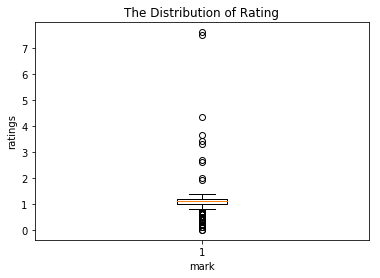

In [74]:
#1: The distribution of rating
ratingValue = list(df['rating'])
plt.boxplot(ratingValue)
plt.xlabel('mark')
plt.ylabel('ratings')
plt.title('The Distribution of Rating')
plt.show()

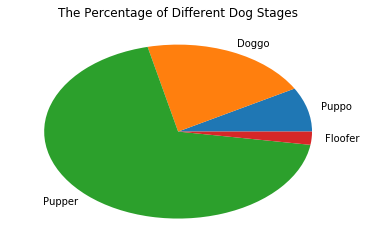

In [75]:
#2: The percentage of different dog stages
dogStagesCount = [len(df[df['stages'] == 'puppo']),len(df[df['stages'] == 'doggo']),
                  len(df[df['stages'] == 'pupper']),len(df[df['stages'] == 'floofer'])]

plt.pie(dogStagesCount,labels=['Puppo','Doggo','Pupper','Floofer'])
plt.title('The Percentage of Different Dog Stages')
plt.show()

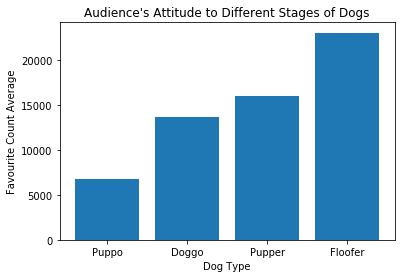

In [76]:
#3: Audience's attitude to different stages of dogs.
#Here we use favourite average because retweet is not always means positive attitude.
#Calculate avg of favourite count and use bar chart to visualise them

stagesAvg = sorted([df[df['stages'] == 'puppo']['favourite_count'].mean(),
             df[df['stages'] == 'doggo']['favourite_count'].mean(),
             df[df['stages'] == 'pupper']['favourite_count'].mean(),
             df[df['stages'] == 'floofer']['favourite_count'].mean()])

labelName = ['Puppo','Doggo','Pupper','Floofer']


plt.xticks(range(len(stagesAvg)), labelName)
plt.xlabel('Dog Type')
plt.ylabel('Favourite Count Average')
plt.title("Audience's Attitude to Different Stages of Dogs")
plt.bar(range(len(stagesAvg)), stagesAvg) 
plt.show()
